In [8]:
import requests
import pandas
from io import BytesIO
from PIL import Image

Url de la API SII para obtener los detalles catastarles

In [ ]:
url = "https://www4.sii.cl/mapasui/services/data/mapasFacadeService/getPredioNacional"

Página con datos parciales del detalle catastral de cada predio, se puede usar para los valores obtener: 
- comuna
- manzana
- predio

https://www4.sii.cl/sismunInternet/?caller=DETALLE_CAT_Y_ROL_COBRO

In [ ]:
df = pandas.read_csv('BRTMPCATASN_2022_2_07101', sep = '|')
df.columns = ["Código SII de la Comuna", "Número de Manzana", "Número de Predial", "Dirección o nombre del predio", "Avalúo fiscal total", "Contribución semestral (con aseo)", "Código de destino principal", "Avalúo exento de la propiedad", "Código SII de la Comuna Rol Bien Común 1", "Número de Manzana Rol Bien Común 1", "Número de predio Rol Bien Común 1", "Código SII de la Comuna Rol Bien Común 2","Número de Manzana Rol Bien Común 2", "Número de predio Rol Bien Común 2", "Superficie total del terreno de la propiedad"]
#df.iloc[0:5,0:15]
df.iloc[0:5,0:3]

,Código SII de la Comuna,Número de Manzana,Número de Predial
0,7101,6,15
1,7101,6,16
2,7101,6,17
3,7101,6,18
4,7101,6,23


In [ ]:
comuna = df.iloc[0,0]
manzana = df.iloc[0,1]
predio = df.iloc[0,2]
print(comuna, manzana, predio)

7101 6 15


In [ ]:
metadata = {
    "namespace":"cl.sii.sdi.lob.bbrr.mapas.data.api.interfaces.MapasFacadeService/getPredioNacional",
    "conversationId":"UNAUTHENTICATED-CALL190.164.8.216",
    "transactionId":"6522a1b5-272c-6dda-17ab-4d7697ce50ae"
    }

    
data = {
    "predio":{"comuna":7101,"manzana":1325,"predio":5}, #usar variables para comuna, manzana y predio.
    "servicios":[]
    }


In [ ]:
resp = requests.post(url, json = { 
    "data" : data,
    "metaData" : metadata
})

In [ ]:
resp.json()

{'data': {'comuna': 7101,
  'manzana': 1325,
  'predio': 5,
  'eacs': 14,
  'eacano': 2022,
  'eacsDescripcion': 'RAV NO AGRICOLA 2022',
  'nombreProp': None,
  'direccion': 'AVDA MANSO DE VELASCO 1460 APUMANQUE',
  'nombreComuna': 'CURICÓ',
  'destinoDescripcion': 'HABITACIONAL',
  'rol': '1325-5',
  'rut': None,
  'dv': None,
  'ubicacion': 'URBANA',
  'tablaOrigen': 'PREDIOS_NACIONAL',
  'procesoPrerol': None,
  'medidaSup': 'm²',
  'medidaSupConst': 'm²',
  'periodo': 'SEGUNDO SEMESTRE DE 2022',
  'existePredio': 1,
  'comunaCnp': 7101,
  'manzanaCnp': 1325,
  'predioCnp': 5,
  'valorTotal': 21201441,
  'valorAfecto': 0,
  'valorExento': 21201441,
  'supTerreno': 0.0,
  'supConsMt2': 0.0,
  'supConsMt3': 0.0,
  'ah': 'HBB038',
  'ubicacionX': -34.973257,
  'ubicacionY': -71.234751,
  'predioNac': None,
  'predioPublicado': {'id': 135257937,
   'comuna': 7101,
   'manzana': 1325,
   'predio': 5,
   'ubicacionX': 295991.10655,
   'ubicacionY': 6127641.4734},
  'datosAh': {'codigoAh':

service=WMS
request=GetMap
layers=sii%3ABR_CART_CURICO_WMS
styles=PREDIOS_WMS_V0
format=image%2Fpng
transparent=true
version=1.1.1
comuna=7101   'ubicacionX': 296124.07761875,

eac=0
eacano=
height=256
width=256
srs=EPSG%3A3857
bbox=-7929883.062417325,-4160314.5755055724,-7929730.188360754,-4160161.7014490017"


HAY que obtener LAYER y STYLES

el resto de la info ya se tiene, y hay que derivar el bbox en base a ubicacionX y ubicacionY

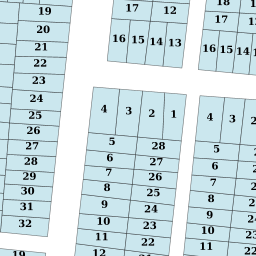

In [7]:
url = "https://www4.sii.cl/mapasui/services/ui/wmsProxyService/call?service=WMS&request=GetMap&layers=sii%3ABR_CART_CURICO_WMS&styles=PREDIOS_WMS_V0&format=image%2Fpng&transparent=true&version=1.1.1&comuna=7101&eac=0&eacano=0&height=256&width=256&srs=EPSG%3A3857&bbox=-7929883.062417325,-4160314.5755055724,-7929730.188360754,-4160161.7014490017"
response = requests.get(url)
Image.open(BytesIO(response.content))